# Greedy Heuristics for TSP with Node Selection

## Problem Description

Given a set of nodes with (x, y) coordinates and costs, the goal is to:
1. **Select exactly 50% of nodes** (rounded up if odd number of nodes)
2. **Form a Hamiltonian cycle** through the selected nodes
3. **Minimize the objective function**: total path length + sum of selected node costs
4. **Distance calculation**: Euclidean distances rounded to nearest integer

## Implemented Algorithms

### 1. Random Solution
**Pseudocode:**
```
1. Randomly select required number of nodes from all available nodes
2. Create random permutation of selected nodes as route
3. Return solution with selected nodes and route
```

### 2. Nearest Neighbor Construction Heuristic
**Pseudocode:**
```
1. Select (e.g. randomly) the starting vertex
2. Repeat:
   - Add to the solution the vertex (and the leading edge) closest to 
     the last one added
   Until all vertices have been added
3. Add the edge from the last to the first vertex
```

### 3. Nearest Neighbor (Any Position)
**Pseudocode:**
```
1. Start with startNode in the route
2. While route size < required nodes:
   a. For each unselected node:
      - For each possible position in route:
        * Calculate objective change if inserted at this position
      - Keep best position for this node
   b. Select node and position with best objective change
   c. Insert selected node at best position
3. Return solution
```

### 4. Greedy Cycle Construction Heuristic
**Pseudocode:**
```
1. Select (e.g. randomly) the starting vertex
2. Choose the nearest vertex and create an incomplete cycle from these 
   two vertices
3. Repeat:
   - Insert into the current cycle in the best possible place the vertex 
     causing the smallest increase in cycle length
   Until all vertices have been added
```

**Note:** "Nearest" and "closest" consider the best change in objective function (distance + cost), not just geometric distance.

## Setup and Data Loading

In [64]:
# Import utilities and libraries
import sys
import os
import importlib

# Add analysis directory to Python path (notebook runs from project root)
analysis_dir = os.path.join(os.getcwd(), 'analysis')
if analysis_dir not in sys.path:
    sys.path.insert(0, analysis_dir)

# Import and reload utils to get latest changes
import utils
importlib.reload(utils)
from utils import *

import warnings
warnings.filterwarnings('ignore')

# Set up plotting style
setup_plotting_style()

print("Libraries and utilities imported and reloaded successfully!")

Libraries and utilities imported and reloaded successfully!


## Configuration

Configure the analysis parameters and algorithm folder to analyze.

In [65]:
# Configuration: Set the algorithm folder name here
# Change this to analyze different algorithm results (e.g., "greedy", "genetic", "simulated_annealing", etc.)
ALGORITHM_FOLDER = "greedy"

# Instances to analyze (can be modified as needed)
INSTANCES = ['TSPA', 'TSPB']

# Export settings
EXPORT_ENABLED = False
EXPORT_PLOTS = False
PLOT_FORMAT = 'png'  # Options: 'png', 'pdf', 'svg'
PLOT_DPI = 300

print(f"Configuration set:")
print(f"  Algorithm folder: {ALGORITHM_FOLDER}")
print(f"  Instances: {INSTANCES}")
print(f"  Export enabled: {EXPORT_ENABLED}")
print(f"  Plot format: {PLOT_FORMAT} (DPI: {PLOT_DPI})")

Configuration set:
  Algorithm folder: greedy
  Instances: ['TSPA', 'TSPB']
  Export enabled: False
  Plot format: png (DPI: 300)


In [66]:
# Load algorithm data using utility functions
algorithm_data = load_all_algorithm_results(ALGORITHM_FOLDER, INSTANCES)

if algorithm_data:
    print(f"\nSuccessfully loaded data for {len(algorithm_data)} instances")
    for instance_name, data in algorithm_data.items():
        df = data['df']
        print(f"{instance_name}: {len(df)} results")
else:
    print("No data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")
    print(f"Available algorithm folders: {get_available_algorithm_folders()}")
    for folder in get_available_algorithm_folders():
        instances = get_available_instances(folder)
        print(f"  {folder}: {instances}")

Loaded 1000 results for TSPA from greedy folder
Algorithms: ['GreedyCycle', 'NearestNeighborAny', 'NearestNeighborEnd', 'RandomSolution']
Loaded 1000 results for TSPB from greedy folder
Algorithms: ['GreedyCycle', 'NearestNeighborAny', 'NearestNeighborEnd', 'RandomSolution']

Successfully loaded data for 2 instances
TSPA: 1000 results
TSPB: 1000 results


## Visualization Data Exporter

This section provides functionality to export visualization data and results to files for use in other analysis tools.

In [67]:
# Create exporter instance using the utility class
exporter = VisualizationExporter(ALGORITHM_FOLDER)
print(f"Visualization exporter created for algorithm folder: {ALGORITHM_FOLDER}")
print(f"Output directory: {exporter.output_dir}")

Visualization exporter created for algorithm folder: greedy
Output directory: results\greedy


## Computational Experiment Results

## Export Results

Export the loaded algorithm results to various formats for further analysis and archival.

In [68]:
# Export all results using the visualization exporter
if algorithm_data and EXPORT_ENABLED:
    print("Exporting algorithm results...")
    
    # Export best solutions data
    exporter.export_best_solutions_data(algorithm_data, filename_suffix="_analysis")
    
    # Export statistical summaries
    exporter.export_statistics_summary(algorithm_data, filename_suffix="_analysis")
    
    # Export visualization plots (if enabled)
    if EXPORT_PLOTS:
        exporter.export_visualization_plots(algorithm_data, filename_suffix="_analysis", 
                                           save_format=PLOT_FORMAT, dpi=PLOT_DPI)
    
    print(f"\nAll exports completed! Files saved to: {exporter.output_dir}")
    print(f"Algorithm folder: {ALGORITHM_FOLDER}")
elif not EXPORT_ENABLED:
    print("Export is disabled. Set EXPORT_ENABLED = True to enable exporting.")
else:
    print("No algorithm data loaded. Please check the ALGORITHM_FOLDER setting and ensure results exist.")

Export is disabled. Set EXPORT_ENABLED = True to enable exporting.


In [69]:
# Display algorithm statistics using utility function
display_algorithm_statistics(algorithm_data)


INSTANCE: TSPA

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
RandomSolution       400      234504.00  299101.00  264408.78  YES       
GreedyCycle          200      71488.00   74410.00   72635.98   YES       
NearestNeighborAny   200      71488.00   74410.00   72635.98   YES       
NearestNeighborEnd   200      83182.00   89433.00   85108.51   YES       

INSTANCE: TSPB

Algorithm Performance:
--------------------------------------------------------------------------------
Algorithm            Runs     Min        Max        Average    Validated 
--------------------------------------------------------------------------------
RandomSolution       400      186356.00  238559.00  213929.83  YES       
GreedyCycle          200      49001.00   57324.00   51400.60   YES       
Near

## 2D Visualization of Best Solutions

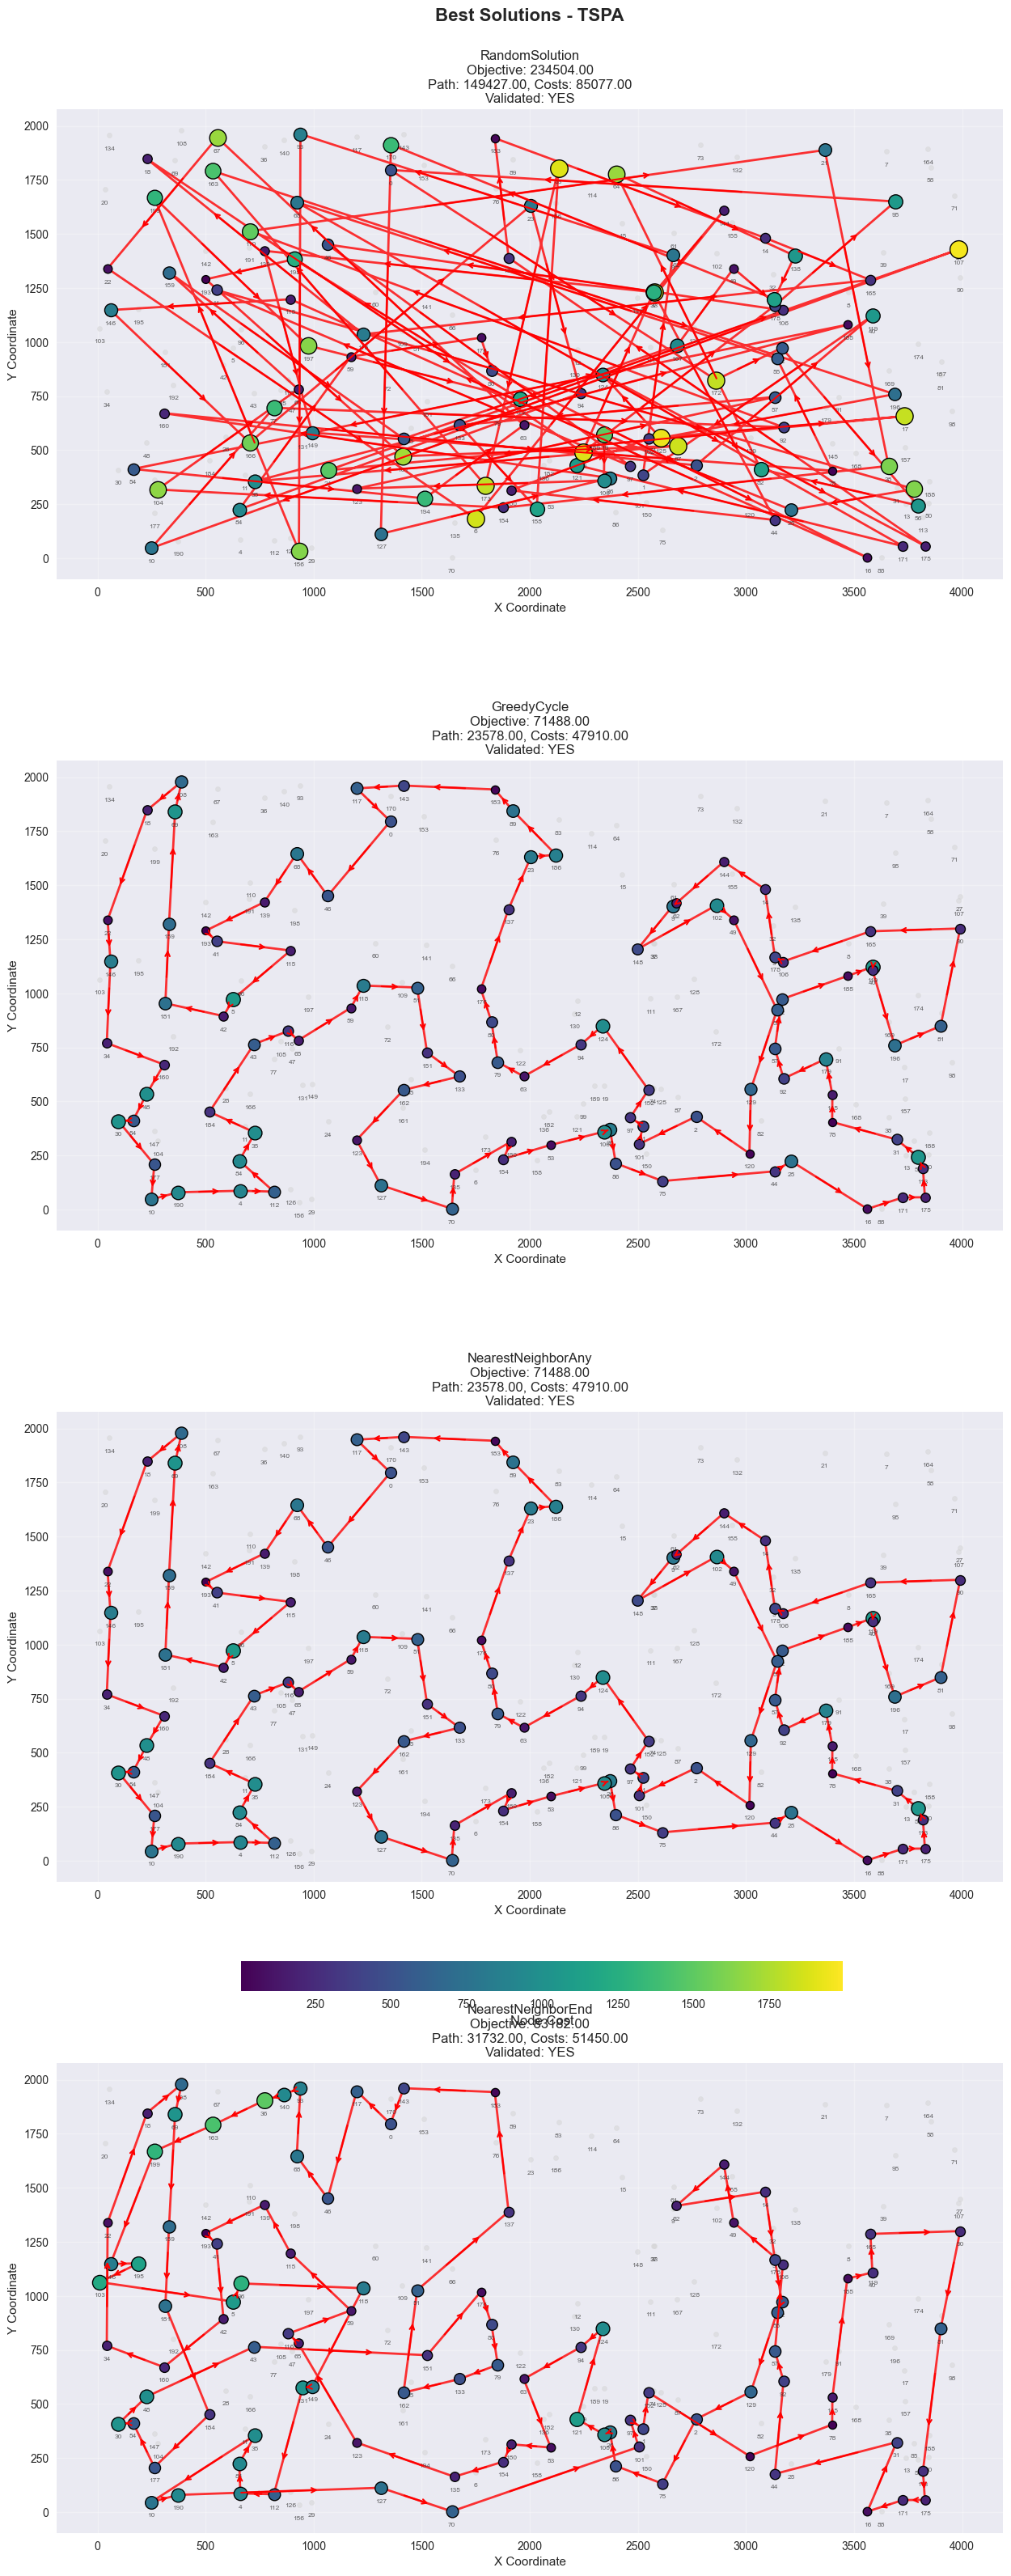


TSPA - Best Solution Node Indices (0-based):
------------------------------------------------------------
RandomSolution: [107, 84, 59, 176, 80, 16, 115, 146, 166, 23, 94, 10, 77, 92, 110, 21, 38, 154, 104, 65, 159, 162, 167, 49, 106, 46, 97, 41, 85, 25, 19, 100, 123, 57, 133, 158, 83, 173, 163, 196, 125, 124, 175, 137, 183, 14, 165, 118, 18, 99, 178, 95, 0, 172, 52, 56, 82, 64, 138, 3, 170, 127, 26, 160, 2, 119, 1, 9, 93, 156, 199, 197, 122, 198, 193, 161, 87, 35, 185, 54, 194, 63, 67, 22, 6, 144, 33, 139, 149, 78, 55, 68, 171, 121, 37, 44, 180, 152, 17, 24] [VALIDATED]
GreedyCycle: [0, 46, 68, 139, 193, 41, 115, 5, 42, 181, 159, 69, 108, 18, 22, 146, 34, 160, 48, 54, 30, 177, 10, 190, 4, 112, 84, 35, 184, 43, 116, 65, 59, 118, 51, 151, 133, 162, 123, 127, 70, 135, 180, 154, 53, 100, 26, 86, 75, 44, 25, 16, 171, 175, 113, 56, 31, 78, 145, 179, 92, 57, 52, 185, 119, 40, 196, 81, 90, 165, 106, 178, 14, 144, 62, 9, 148, 102, 49, 55, 129, 120, 2, 101, 1, 97, 152, 124, 94, 63, 79, 80, 176

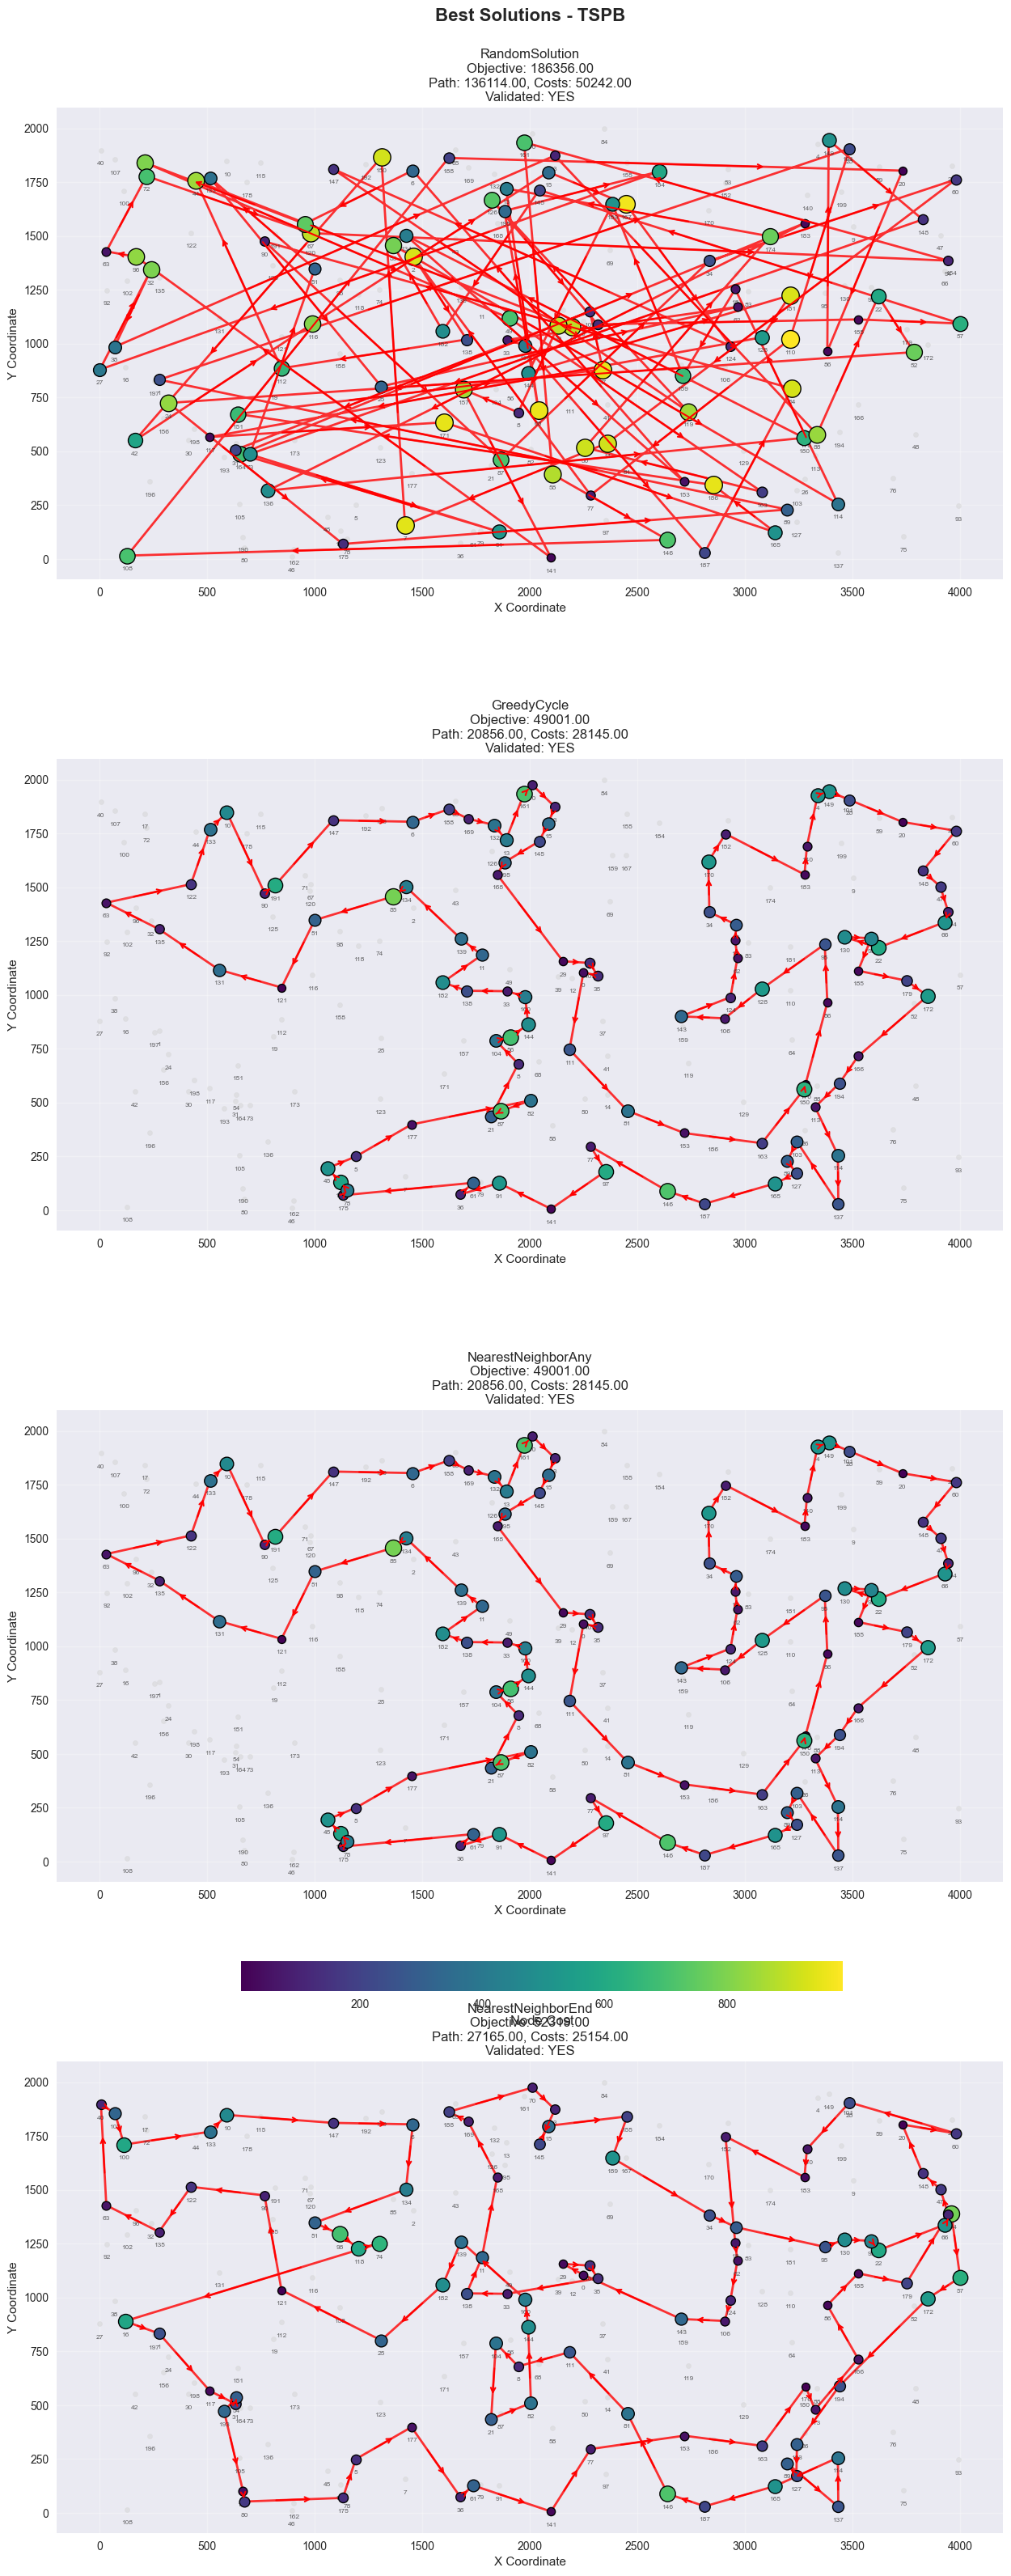


TSPB - Best Solution Node Indices (0-based):
------------------------------------------------------------
RandomSolution: [175, 89, 1, 28, 110, 77, 2, 138, 112, 44, 12, 39, 8, 157, 141, 96, 63, 72, 67, 94, 161, 58, 146, 108, 188, 20, 86, 149, 148, 73, 51, 133, 25, 62, 33, 160, 187, 64, 90, 87, 34, 60, 14, 7, 150, 42, 116, 15, 167, 124, 147, 119, 126, 35, 185, 57, 145, 182, 85, 114, 18, 159, 189, 144, 181, 128, 117, 171, 165, 186, 151, 37, 109, 31, 91, 164, 183, 136, 180, 134, 153, 6, 71, 17, 49, 163, 50, 174, 13, 68, 195, 184, 27, 32, 38, 3, 88, 22, 52, 24] [VALIDATED]
GreedyCycle: [85, 51, 121, 131, 135, 63, 122, 133, 10, 90, 191, 147, 6, 188, 169, 132, 13, 161, 70, 3, 15, 145, 195, 168, 29, 109, 35, 0, 111, 81, 153, 163, 180, 176, 86, 95, 128, 106, 143, 124, 62, 18, 55, 34, 170, 152, 183, 140, 4, 149, 28, 20, 60, 148, 47, 94, 66, 22, 130, 99, 185, 179, 172, 166, 194, 113, 114, 137, 103, 89, 127, 165, 187, 146, 77, 97, 141, 91, 36, 61, 175, 78, 142, 45, 5, 177, 82, 87, 21, 8, 104, 56

In [70]:
# Plot best solutions using utility function
plot_best_solutions(algorithm_data)

## Algorithm Performance Comparison

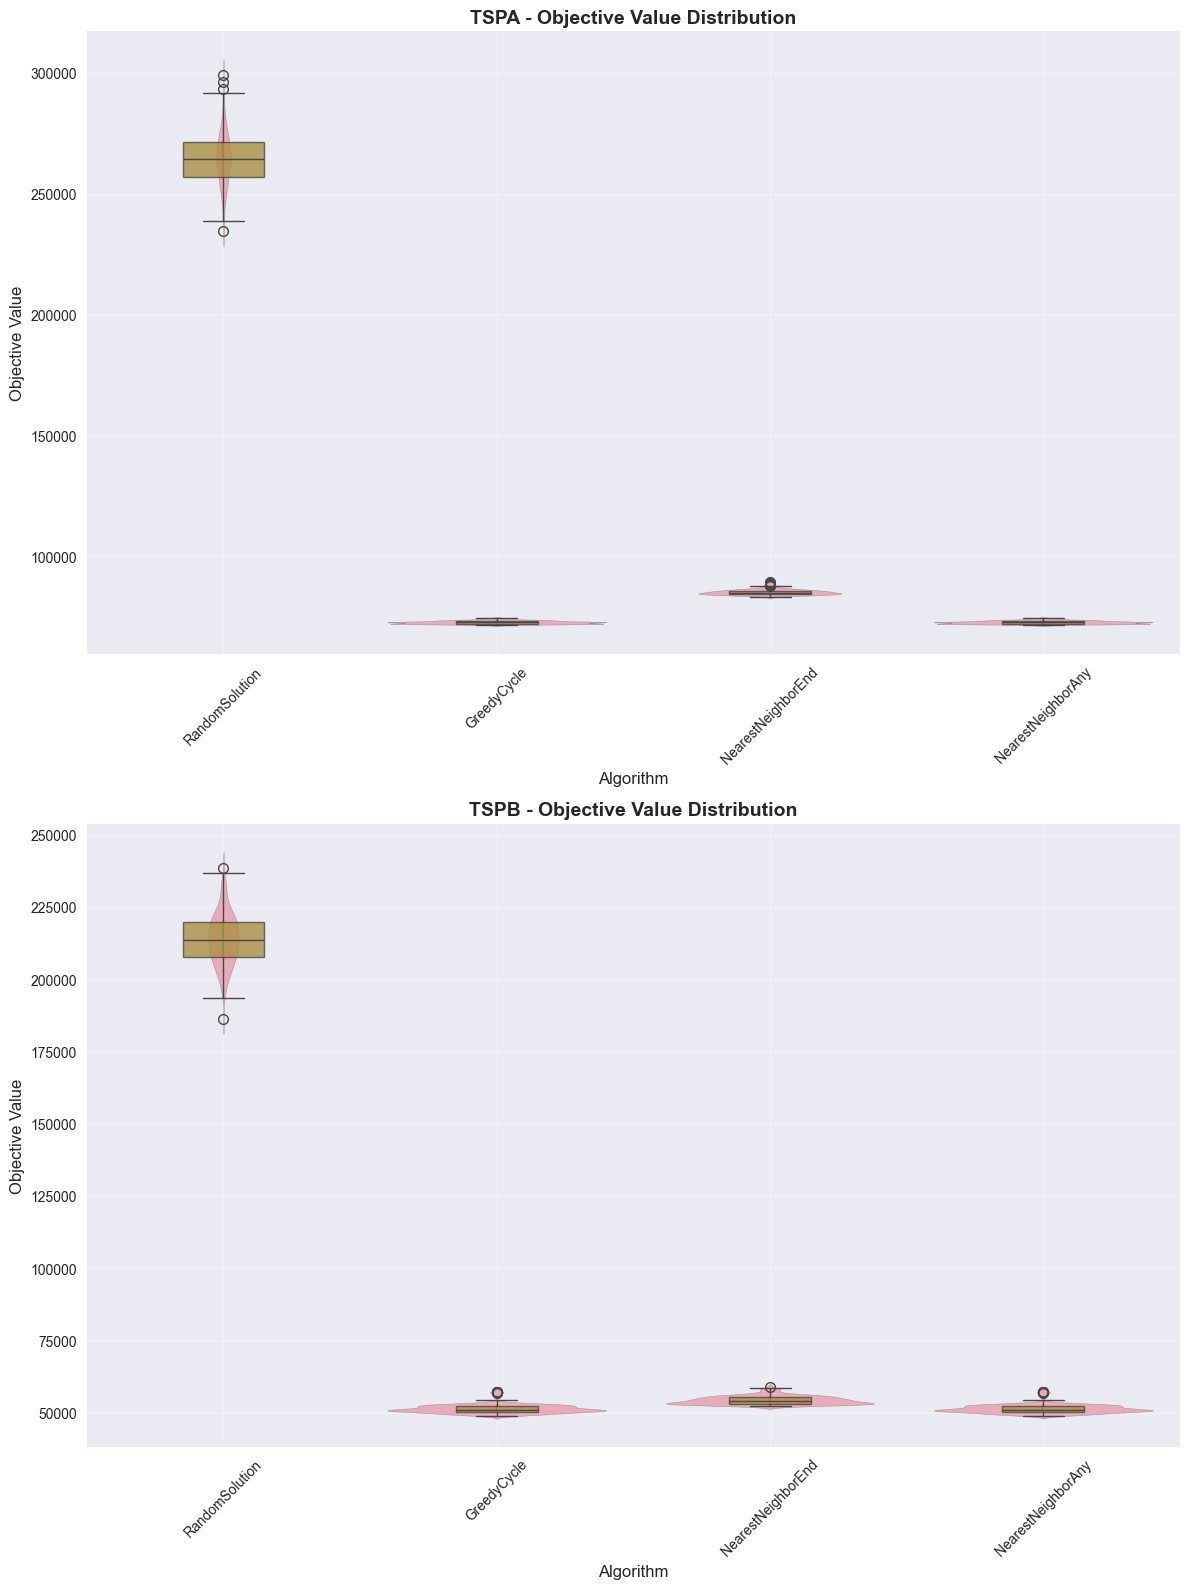

In [71]:
# Performance comparison plots using utility functions
plot_objective_distributions(algorithm_data)

## Solution Validation Results

In [72]:
# Display validation results using utility function
display_validation_results(algorithm_data)


SOLUTION VALIDATION - TSPA

RandomSolution:
  Objective Value: 234504.00
  Path Length: 149427.00
  Node Costs: 85077.00
  Selected Nodes: 100
  Validation Status: PASSED
  Validation Details:
    Validation PASSED

GreedyCycle:
  Objective Value: 71488.00
  Path Length: 23578.00
  Node Costs: 47910.00
  Selected Nodes: 100
  Validation Status: PASSED
  Validation Details:
    Validation PASSED

NearestNeighborAny:
  Objective Value: 71488.00
  Path Length: 23578.00
  Node Costs: 47910.00
  Selected Nodes: 100
  Validation Status: PASSED
  Validation Details:
    Validation PASSED

NearestNeighborEnd:
  Objective Value: 83182.00
  Path Length: 31732.00
  Node Costs: 51450.00
  Selected Nodes: 100
  Validation Status: PASSED
  Validation Details:
    Validation PASSED

SOLUTION VALIDATION - TSPB

RandomSolution:
  Objective Value: 186356.00
  Path Length: 136114.00
  Node Costs: 50242.00
  Selected Nodes: 100
  Validation Status: PASSED
  Validation Details:
    Validation PASSED

Gree

## Statistical Analysis

In [73]:
# Perform statistical analysis using utility function
perform_statistical_analysis(algorithm_data)


STATISTICAL ANALYSIS - TSPA

Descriptive Statistics:
--------------------------------------------------
                    Count       Mean       Std  ...       Max         Q1         Q3
base_algorithm                                  ...                                
GreedyCycle           200   72635.98    643.50  ...   74410.0   72081.00   73047.50
NearestNeighborAny    200   72635.98    643.50  ...   74410.0   72081.00   73047.50
NearestNeighborEnd    200   85108.51   1087.49  ...   89433.0   84293.25   85692.50
RandomSolution        400  264408.78  10557.92  ...  299101.0  257074.75  271302.75

[4 rows x 7 columns]

Coefficient of Variation (CV %):
------------------------------
GreedyCycle: 0.89%
NearestNeighborAny: 0.89%
NearestNeighborEnd: 1.28%
RandomSolution: 3.99%

Performance Improvement Analysis:
----------------------------------------
Best algorithm: GreedyCycle (avg: 72635.98)
Improvement over other algorithms:
  vs NearestNeighborAny: 0.0% improvement
  vs NearestNe

## Conclusions

### Algorithm Performance Summary

Based on the computational experiments, we can draw the following conclusions:

1. **Algorithm Effectiveness**: 
   - The greedy algorithms consistently outperform random solutions
   - Greedy Cycle typically provides the best solution quality
   - Nearest Neighbor (Any Position) offers good balance between quality and simplicity

2. **Computational Efficiency**:
   - Random solutions are fastest but poorest quality
   - Nearest Neighbor (End) is faster than (Any Position) variant
   - Greedy Cycle takes more time but produces better solutions

3. **Solution Consistency**:
   - Greedy algorithms show lower coefficient of variation
   - Starting node selection significantly impacts solution quality
   - All best solutions pass validation checks

4. **Problem Characteristics**:
   - Node costs play significant role in algorithm performance
   - Geometric distribution of nodes affects greedy choices
   - 50% node selection creates interesting trade-offs

### Recommendations

- **For best solution quality**: Use Greedy Cycle with multiple starting nodes
- **For balanced performance**: Use Nearest Neighbor (Any Position)
- **For quick approximations**: Use Nearest Neighbor (End)
- **Always validate solutions** using the solution checker

### Source Code

The complete implementation is available in the project repository:
- Java source code: `src/main/java/tsp/algorithms/greedyAlgorithms/`
- Solution validation: `src/main/java/tsp/analysis/SolutionChecker.java`
- This analysis notebook: `TSP_Greedy_Analysis.ipynb`